# 8. Neural networks and deep learning

In [1]:
#!pip install tensorflow

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
from tensorflow.keras.preprocessing.image import load_img

In [5]:
path = "./clothing-dataset-small/train/t-shirt/5ce4af56-0a90-49bb-b4bc-23ed04dc1b11.jpg"

The neural network expects images of a certain sizw

In [6]:
img = load_img(path, target_size=(299, 299))

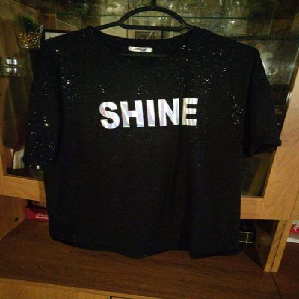

In [7]:
img

In [8]:
np.array(img)

array([[[ 75,  65,  30],
        [ 76,  63,  29],
        [ 75,  62,  28],
        ...,
        [ 19,  14,   8],
        [ 20,  15,   9],
        [ 26,  21,  15]],

       [[ 63,  53,  18],
        [ 68,  55,  21],
        [ 70,  57,  23],
        ...,
        [ 19,  14,   8],
        [ 20,  15,   9],
        [ 25,  20,  14]],

       [[ 68,  58,  23],
        [ 73,  60,  26],
        [ 76,  63,  29],
        ...,
        [ 19,  14,   8],
        [ 19,  14,   8],
        [ 24,  19,  13]],

       ...,

       [[112,  66,  17],
        [115,  71,  22],
        [111,  68,  17],
        ...,
        [ 47,  25,  12],
        [ 46,  24,  13],
        [ 45,  23,  12]],

       [[110,  64,  15],
        [111,  68,  17],
        [107,  66,  12],
        ...,
        [ 48,  24,  14],
        [ 47,  23,  13],
        [ 46,  21,  14]],

       [[109,  63,  14],
        [107,  64,  13],
        [103,  62,   8],
        ...,
        [ 47,  23,  13],
        [ 47,  23,  13],
        [ 46,  21,  14]]

In [9]:
x = np.array(img)
x.shape

(299, 299, 3)

# 8.3 Keras Applications

In [10]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [11]:
model = Xception(weights="imagenet", input_shape=(299, 299, 3))

In [12]:
X = np.array([x])

In [13]:
X = preprocess_input(X)

In [14]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [15]:
pred.shape

(1, 1000)

Each value in ```pred``` is the probability of the image to belong to one of the 1000 classes.

In [16]:
decode_predictions(pred)

[[('n04370456', 'sweatshirt', np.float32(0.40451083)),
  ('n03595614', 'jersey', np.float32(0.30967277)),
  ('n02916936', 'bulletproof_vest', np.float32(0.009767272)),
  ('n03379051', 'football_helmet', np.float32(0.0053174878)),
  ('n09835506', 'ballplayer', np.float32(0.0030425102))]]

The imagenet dataset does not contain tshirt as a class. So it is not particularly well-suited for clothes.

## 8.5 Transfer Learning

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [19]:
train_ds = train_gen.flow_from_directory(
    "./clothing-dataset-small/train", 
    target_size=(150, 150), 
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [20]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

The names of the classes were inferred from the folder structure.

In [21]:
X, y = next(train_ds)

In [22]:
X.shape

(32, 150, 150, 3)

In [23]:
y.shape

(32, 10)

In [24]:
y[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [25]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    "./clothing-dataset-small/validation", 
    target_size=(150, 150), 
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [26]:
base_model = Xception(
    weights="imagenet",
    include_top=False,  # Exclude the dense layers
    input_shape=(150, 150, 3)
)

base_model.trainable = False  # We do not want to train the convolutional layers.

In [27]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs)

outputs = base

model = keras.Model(inputs, outputs)

In [28]:
preds = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [29]:
preds.shape

(32, 5, 5, 2048)

It's not a collection of vectors yet.

Pooling can be applied to turn the 5x5 squares into single values.

In [30]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = vectors

model = keras.Model(inputs, outputs)

In [31]:
preds = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [32]:
preds.shape

(32, 2048)

In [33]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [34]:
preds = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [35]:
preds.shape

(32, 10)

For now the output is nonsense because we haven't trained the model yet.

We need an optimizer to find the best weights.

In [36]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)  # A way of evaluating multi-class classifications models.

In [37]:
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [37]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)  # epochs is the number of times the algorithm is trained over the whole dataset.

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 86s 859ms/step - accuracy: 0.6741 - loss: 1.2295 - val_accuracy: 0.7331 - val_loss: 0.8948
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 70s 726ms/step - accuracy: 0.8090 - loss: 0.6470 - val_accuracy: 0.8240 - val_loss: 0.8205
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 74s 774ms/step - accuracy: 0.8781 - loss: 0.3732 - val_accuracy: 0.7830 - val_loss: 0.8602
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 79s 819ms/step - accuracy: 0.9081 - loss: 0.2676 - val_accuracy: 0.7977 - val_loss: 1.0309
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 79s 821ms/step - accuracy: 0.9371 - loss: 0.1697 - val_accuracy: 0.8035 - val_loss: 0.9097
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 71s 737ms/step - accuracy: 0.9482 - loss: 0.1414 - val_accuracy: 0.7918 - val_loss: 0.9281
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 69s 720ms/step - accuracy: 0.9700 - loss: 0.0835 - val_accuracy: 0.8094 - val_loss: 0.8436
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 69s 723ms/step - accuracy: 0.9883 - loss: 0.0435 - val_accu

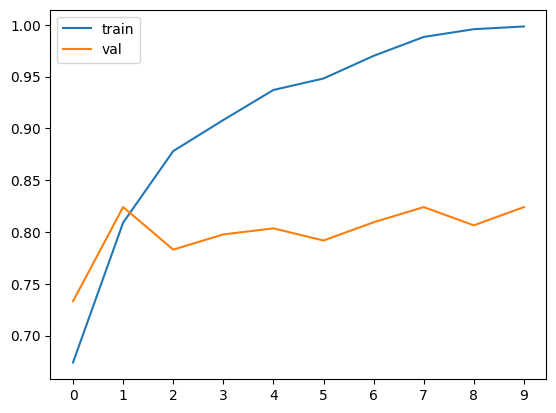

In [38]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.xticks(np.arange(10))
plt.legend()

## 8.6 Adjusting the learning rate

In [39]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights="imagenet",
        include_top=False,
        input_shape=(150, 150, 3)
    )
    base_model.trainable = False

    ##############################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    ##############################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=["accuracy"]
    )

    return model
    

In [40]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    print('\n\n')

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.3272 - loss: 1.9799 - val_accuracy: 0.4692 - val_loss: 1.6285
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.5577 - loss: 1.4074 - val_accuracy: 0.6217 - val_loss: 1.2642
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.6431 - loss: 1.1486 - val_accuracy: 0.6979 - val_loss: 1.0708
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.6845 - loss: 1.0033 - val_accuracy: 0.7331 - val_loss: 0.9613
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.7122 - loss: 0.9066 - val_accuracy: 0.7654 - val_loss: 0.8836
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.7304 - loss: 0.8382 - val_accuracy: 0.7478 - val_loss: 0.8356
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.7461 - loss: 0.7851 - val_accuracy: 0.7683 - val_loss: 0.7894
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.7624 - loss: 0.7415 - val_accuracy: 0.7

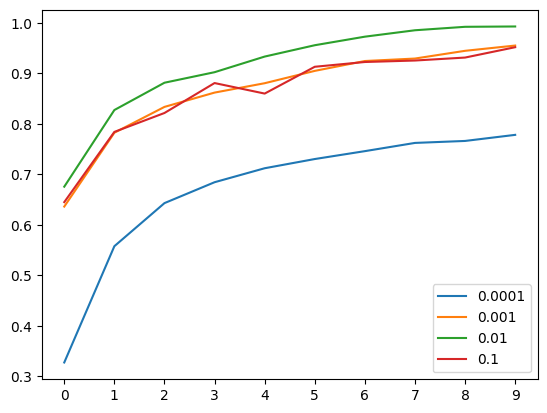

In [42]:
for lr, hist in scores.items():
    plt.plot(hist["accuracy"], label=lr)
    
plt.xticks(np.arange(10))
plt.legend()

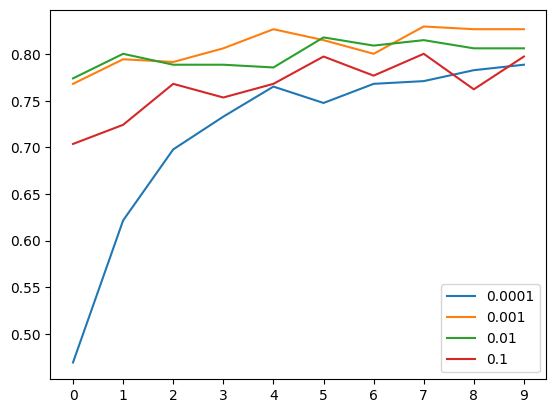

In [43]:
for lr, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=lr)
    
plt.xticks(np.arange(10))
plt.legend()

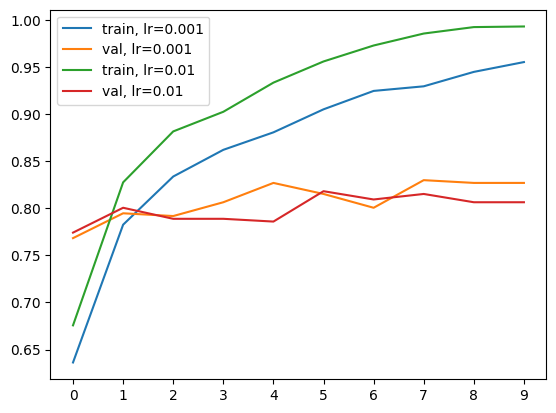

In [44]:
for lr, hist in scores.items():
    if lr in [0.01, 0.001]:
        plt.plot(hist["accuracy"], label=f"train, lr={lr}")
        plt.plot(hist["val_accuracy"], label=f"val, lr={lr}")
    
plt.xticks(np.arange(10))
plt.legend()

The best learning rate is 0.001

In [40]:
learning_rate = 0.001

## 8.7 Checkpointing

In [49]:
model.save_weights("model_v1.weights.h5")

In [50]:
checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5",
    save_best_only=True,
    monitor="val_accuracy",
    mode="max"  # We want to maximize the monitored metric, i.e. val_accuracy.
)

In [51]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5331 - loss: 1.4501

96/96 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.6382 - loss: 1.0918 - val_accuracy: 0.7595 - val_loss: 0.7305
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8011 - loss: 0.6097

96/96 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.7878 - loss: 0.6274 - val_accuracy: 0.7801 - val_loss: 0.6658
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8360 - loss: 0.5001

96/96 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.8302 - loss: 0.5009 - val_accuracy: 0.8182 - val_loss: 0.5970
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.8680 - loss: 0.4292 - val_accuracy: 0.7947 - val_loss: 0.6019
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8895 - loss: 0.3903

96/96 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.8905 - loss: 0.3722 - val_accuracy: 0.8211 - val_loss: 0.5714
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8985 - loss: 0.3411

96/96 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.9009 - loss: 0.3284 - val_accuracy: 0.8328 - val_loss: 0.5423
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.9260 - loss: 0.2873 - val_accuracy: 0.8240 - val_loss: 0.5470
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.9387 - loss: 0.2577 - val_accuracy: 0.8328 - val_loss: 0.5409
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.9417 - loss: 0.2328 - val_accuracy: 0.8299 - val_loss: 0.5452
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.9511 - loss: 0.2103 - val_accuracy: 0.8211 - val_loss: 0.5689


## 8.8 Adding more layers

In [41]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights="imagenet",
        include_top=False,
        input_shape=(150, 150, 3)
    )
    base_model.trainable = False

    ##############################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)

    ##############################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=["accuracy"]
    )

    return model
    

At the end of neural networks, there is the activation step (softmax) which turns the raw scores of the last dense layer into probabilities.

Each dense layer needs an activation in order to achieve better performance. There are different types of activation functions. Sigmoid and softmax are used on the output of the final layer. ReLu (Rectified Linear Unit) is the function most commonly used on the output of inner layers.

In [42]:
learning_rate = 0.001
scores = {}

for size in [10, 100, 1000]:
    print(size)
    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    print('\n\n')

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 76s 756ms/step - accuracy: 0.4459 - loss: 1.5534 - val_accuracy: 0.6158 - val_loss: 1.1986
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 76s 788ms/step - accuracy: 0.6643 - loss: 1.0222 - val_accuracy: 0.7243 - val_loss: 0.8781
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 83s 867ms/step - accuracy: 0.7673 - loss: 0.7003 - val_accuracy: 0.7830 - val_loss: 0.6753
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 88s 918ms/step - accuracy: 0.8158 - loss: 0.5461 - val_accuracy: 0.7977 - val_loss: 0.6417
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 93s 973ms/step - accuracy: 0.8491 - loss: 0.4631 - val_accuracy: 0.7830 - val_loss: 0.6580
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 72s 746ms/step - accuracy: 0.8761 - loss: 0.4014 - val_accuracy: 0.7947 - val_loss: 0.6042
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 76s 798ms/step - accuracy: 0.8950 - loss: 0.3487 - val_accuracy: 0.8123 - val_loss: 0.5781
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 75s 778ms/step - accuracy: 0.9074 - loss: 0.3073 - val_a

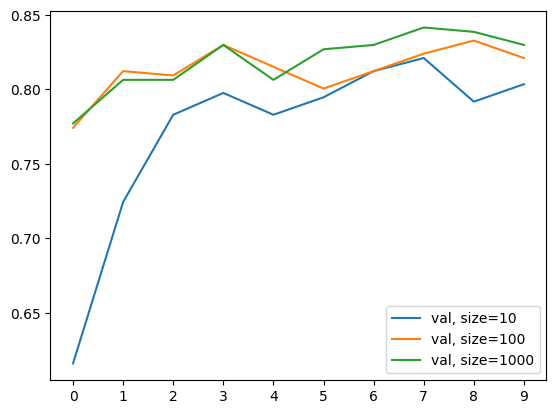

In [43]:
for size, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=f"val, size={size}")
    
plt.xticks(np.arange(10))
plt.legend()

In [44]:
size = 100

## 8.9 Regularization and dropout

Dropout entails hiding part of the input (i.e. image) while training the model. This is actually applied to the inner layers. Part of the inner layer is frozen from one iteration to the next.

In [41]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.6):
    base_model = Xception(
        weights="imagenet",
        include_top=False,
        input_shape=(150, 150, 3)
    )
    base_model.trainable = False

    ##############################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    drop = keras.layers.Dropout(droprate)(inner)  # The drop rate is the fraction of the network that is frozen
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)

    ##############################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=["accuracy"]
    )

    return model
    

In [46]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)
    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )
    history = model.fit(train_ds, epochs=20, validation_data=val_ds)
    scores[droprate] = history.history
    
    print('\n\n')

0.0
Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 85s 843ms/step - accuracy: 0.6692 - loss: 0.9610 - val_accuracy: 0.7713 - val_loss: 0.6796
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 74s 773ms/step - accuracy: 0.8178 - loss: 0.5111 - val_accuracy: 0.8152 - val_loss: 0.5548
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 73s 759ms/step - accuracy: 0.8787 - loss: 0.3514 - val_accuracy: 0.8035 - val_loss: 0.5754
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 73s 758ms/step - accuracy: 0.9198 - loss: 0.2523 - val_accuracy: 0.8182 - val_loss: 0.5378
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 73s 760ms/step - accuracy: 0.9606 - loss: 0.1706 - val_accuracy: 0.7947 - val_loss: 0.5877
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 78s 817ms/step - accuracy: 0.9749 - loss: 0.1192 - val_accuracy: 0.8270 - val_loss: 0.5774
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 80s 832ms/step - accuracy: 0.9821 - loss: 0.0899 - val_accuracy: 0.8152 - val_loss: 0.6332
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 79s 821ms/step - accuracy: 0.9915 - loss: 0.0645 - val_

Because we are freezing part of the network, more iterations (epochs) are needed to train the model.

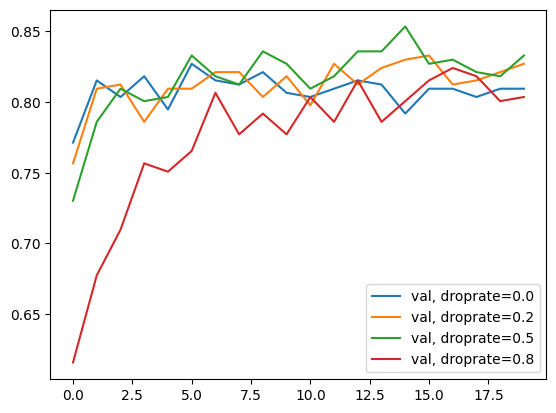

In [47]:
for droprate, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=f"val, droprate={droprate}")

plt.legend()

## 8.10 Data augmentation

In the case of dropout, we hide part of the image, which for example helps prevent the model from associating a logo with a specific type of clothing. There is another way of addressing this kind of issue, which is data augmentation, which entails generating more images from an existing one.

There are several ways of generating more images from existing ones.
1. Flipping/mirroring
2. Rotation
3. Shifting
4. Shearing (pulling down one side of the image)
5. Shrinking and expanding
6. Zoomming in and out
7. Changing the brightness and contrast
8. Apply a patch (similar effect to dropout)

How to choose with augmentations to apply? Use your own judgement based on the data and how you intend to use the model.
For example, if we do not expect the model to encounter an object that is upside-down compared to the training data, there is no need to apply a horizontal flip.

Augmentation is a hyper-parameter of the model. Test different augmentations and compare the performance to the model trained without augmentation.

Data augmentation can be applied via the ImageDataGenerator object.

In [40]:
# train_gen = ImageDataGenerator(
#     preprocessing_function=preprocess_input,
#     rotation_range=30,
#     width_shift_range=10.0,
#     height_shift_range=10.0,
#     shear_range=10.0,
#     zoom_range=0.1,
#     cval=0.0,
#     horizontal_flip=False,
#     vertical_flip=True,
# )

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    "./clothing-dataset-small/train", 
    target_size=(150, 150), 
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    "./clothing-dataset-small/validation", 
    target_size=(150, 150), 
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


Transformations are not applied to the validation dataset so that the outcome can be compared to the other models based on the exact same validation data.

In [42]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 76s 754ms/step - accuracy: 0.5623 - loss: 1.3040 - val_accuracy: 0.7478 - val_loss: 0.7649
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 72s 747ms/step - accuracy: 0.6982 - loss: 0.8911 - val_accuracy: 0.7771 - val_loss: 0.6634
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 73s 762ms/step - accuracy: 0.7422 - loss: 0.7757 - val_accuracy: 0.7859 - val_loss: 0.6591
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 73s 757ms/step - accuracy: 0.7546 - loss: 0.7117 - val_accuracy: 0.7977 - val_loss: 0.6229
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 73s 760ms/step - accuracy: 0.7761 - loss: 0.6505 - val_accuracy: 0.7977 - val_loss: 0.6111
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 75s 784ms/step - accuracy: 0.7979 - loss: 0.5814 - val_accuracy: 0.7977 - val_loss: 0.6270
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 75s 775ms/step - accuracy: 0.7986 - loss: 0.5814 - val_accuracy: 0.7889 - val_loss: 0.5905
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 77s 796ms/step - accuracy: 0.8077 - loss: 0.5398 - val_accu

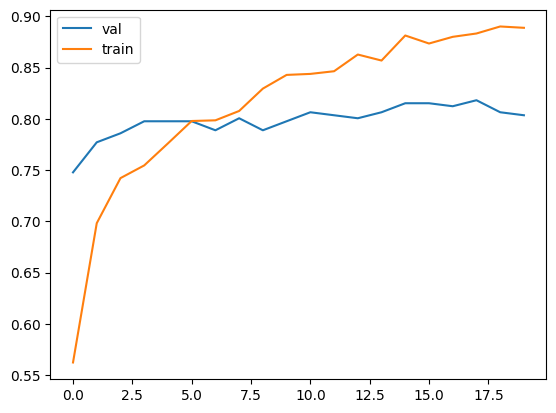

In [43]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## 8.11 Training a larger model

We will train a model on 299x299 images, which takes 4 times longer that with 150x150 images.

In [12]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100, droprate=0.6):
    base_model = Xception(
        weights="imagenet",
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )
    base_model.trainable = False

    ##############################################
    
    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    drop = keras.layers.Dropout(droprate)(inner)  # The drop rate is the fraction of the network that is frozen
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)

    ##############################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=["accuracy"]
    )

    return model
    

In [13]:
input_size = 299

In [14]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    "./clothing-dataset-small/train", 
    target_size=(input_size, input_size), 
    batch_size=32
)

val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

val_ds = val_gen.flow_from_directory(
    "./clothing-dataset-small/validation", 
    target_size=(input_size, input_size), 
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [15]:
checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5",
    save_best_only=True,
    monitor="val_accuracy",
    mode="max"  # We want to maximize the monitored metric, i.e. val_accuracy.
)

In [16]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds, 
    callbacks=[checkpoint]
)

Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5369 - loss: 1.4566

96/96 ━━━━━━━━━━━━━━━━━━━━ 318s 3s/step - accuracy: 0.6819 - loss: 1.0352 - val_accuracy: 0.8534 - val_loss: 0.5184
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8193 - loss: 0.5490

96/96 ━━━━━━━━━━━━━━━━━━━━ 327s 3s/step - accuracy: 0.8201 - loss: 0.5305 - val_accuracy: 0.8563 - val_loss: 0.4330
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8603 - loss: 0.4222

96/96 ━━━━━━━━━━━━━━━━━━━━ 327s 3s/step - accuracy: 0.8497 - loss: 0.4377 - val_accuracy: 0.8651 - val_loss: 0.3898
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8600 - loss: 0.3840

96/96 ━━━━━━━━━━━━━━━━━━━━ 326s 3s/step - accuracy: 0.8615 - loss: 0.3898 - val_accuracy: 0.8739 - val_loss: 0.3751
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 317s 3s/step - accuracy: 0.8794 - loss: 0.3420 - val_accuracy: 0.8739 - val_loss: 0.3706
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8909 - loss: 0.3188

96/96 ━━━━━━━━━━━━━━━━━━━━ 317s 3s/step - accuracy: 0.8869 - loss: 0.3244 - val_accuracy: 0.8798 - val_loss: 0.3681
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9104 - loss: 0.2733

96/96 ━━━━━━━━━━━━━━━━━━━━ 324s 3s/step - accuracy: 0.9032 - loss: 0.2976 - val_accuracy: 0.8856 - val_loss: 0.3684
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 343s 4s/step - accuracy: 0.9022 - loss: 0.2876 - val_accuracy: 0.8856 - val_loss: 0.3574
Epoch 9/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9110 - loss: 0.2669

96/96 ━━━━━━━━━━━━━━━━━━━━ 385s 4s/step - accuracy: 0.9081 - loss: 0.2663 - val_accuracy: 0.8944 - val_loss: 0.3448
Epoch 10/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 395s 4s/step - accuracy: 0.9162 - loss: 0.2441 - val_accuracy: 0.8915 - val_loss: 0.3299
Epoch 11/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 325s 3s/step - accuracy: 0.9182 - loss: 0.2309 - val_accuracy: 0.8856 - val_loss: 0.3437
Epoch 12/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 301s 3s/step - accuracy: 0.9234 - loss: 0.2304 - val_accuracy: 0.8739 - val_loss: 0.3495
Epoch 13/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 303s 3s/step - accuracy: 0.9329 - loss: 0.2061 - val_accuracy: 0.8856 - val_loss: 0.3530
Epoch 14/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 358s 4s/step - accuracy: 0.9273 - loss: 0.2043 - val_accuracy: 0.8798 - val_loss: 0.3495
Epoch 15/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 300s 3s/step - accuracy: 0.9400 - loss: 0.1904 - val_accuracy: 0.8915 - val_loss: 0.3403
Epoch 16/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 299s 3s/step - accuracy: 0.9495 - loss: 0.1742 - val_accuracy: 0.8915 - val_l

## 8.12 Using the model

In [17]:
import tensorflow as tf
from tensorflow import keras

In [19]:
keras.models.load_model("xception_v4_09_0.894.h5")

<Functional name=functional, built=True>

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input

In [22]:
input_size = 299

test_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

test_ds = test_gen.flow_from_directory(
    "./clothing-dataset-small/validation", 
    target_size=(input_size, input_size), 
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [23]:
model.evaluate(test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.8768 - loss: 0.3719


[0.3718518912792206, 0.8768328428268433]

In [24]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [25]:
img = load_img(path, target_size=(input_size, input_size))

In [26]:
import numpy as np

In [27]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [28]:
X = preprocess_input(X)

In [29]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [30]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [31]:
dict(zip(classes, pred[0]))

{'dress': np.float32(-3.7827446),
 'hat': np.float32(-3.790707),
 'longsleeve': np.float32(-2.4064333),
 'outwear': np.float32(-4.1086864),
 'pants': np.float32(9.478106),
 'shirt': np.float32(-3.0174851),
 'shoes': np.float32(-4.5757265),
 'shorts': np.float32(2.9994028),
 'skirt': np.float32(-5.852733),
 't-shirt': np.float32(-4.4095907)}